# Chapter 16 in chapter figures

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 16.1: Analytic vs empirical $H_0$ distribution

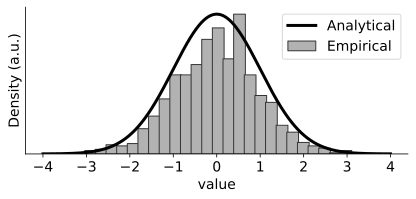

In [3]:
# x-axis grid
x = np.linspace(-4,4,1001)

# compute and normalize the analytic pdf
analytical = stats.norm.pdf(x)
analytical /= np.max(analytical)

# same for empirical
empirical = np.random.normal(loc=0,scale=1,size=len(x))
yy,xx = np.histogram(empirical,bins='fd')
yy = yy/np.max(yy)
xx = (xx[1:]+xx[:-1])/2


## draw the figure
plt.figure(figsize=(6,3))
plt.bar(xx,yy,width=.27,color=(.7,.7,.7),edgecolor=(.2,.2,.2),label='Empirical')
plt.plot(x,analytical,'k',linewidth=3,label='Analytical')

plt.xlabel('value')
plt.yticks([])
plt.ylabel('Density (a.u.)')
plt.legend()

plt.tight_layout()
plt.show()
     


### Fig 16.3 and 16.4: comparing two sample means

In [4]:
# number of 'trials' in each condition (trial inbalance)
n1 = 50
n2 = 70  

# create data (with mean offset)
data1 = np.random.randn(n1,1)
data2 = np.random.randn(n2,1) + .3  

# pool the data into one variable (convenient for shuffling)
alldata = np.concatenate((data1, data2))

# corresponding labels
truelabels = np.concatenate((np.ones(n1), 2*np.ones(n2)))

# compute the observed condition difference
true_conddif = np.mean(alldata[truelabels==1]) - np.mean(alldata[truelabels==2])


# creating a null-hypothesis (H0) distribution

# number of iterations for permutation testing
nIterations = 1000

# initialize output variable
permvals = np.zeros(nIterations)

for permi in range(nIterations):
  # random permutation to swap the labels
  shuflabels = np.random.permutation(truelabels)

  # mean differences in the shuffled data
  permvals[permi] = np.mean(alldata[shuflabels==1]) - np.mean(alldata[shuflabels==2])

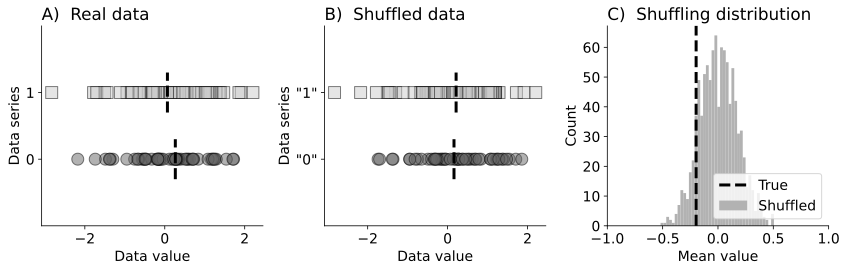

In [5]:
_,axs = plt.subplots(1,3,figsize=(12,4))

# real data and means
axs[0].plot(data1,np.zeros(n1),'ko',markersize=12,markerfacecolor=(.4,.4,.4),alpha=.5)
axs[0].plot(data2,np.ones(n2),'ks',markersize=12,markerfacecolor=(.8,.8,.8),alpha=.5)
axs[0].plot([np.mean(data1),np.mean(data1)],[.7,1.3],'k--',linewidth=3)
axs[0].plot([np.mean(data2),np.mean(data2)],[-.3,.3],'k--',linewidth=3)
axs[0].set(ylim=[-1,2],ylabel='Data series',yticks=[0,1],xlabel='Data value')
axs[0].set_title(r'A)  Real data')

# one example shuffled data
axs[1].plot(alldata[shuflabels==1],np.zeros(n1),'ko',markersize=12,markerfacecolor=(.4,.4,.4),alpha=.5)
axs[1].plot(alldata[shuflabels==2],np.ones(n2),'ks',markersize=12,markerfacecolor=(.8,.8,.8),alpha=.5)
axs[1].plot([np.mean(alldata[shuflabels==1]),np.mean(alldata[shuflabels==1])],[.7,1.3],'k--',linewidth=3)
axs[1].plot([np.mean(alldata[shuflabels==2]),np.mean(alldata[shuflabels==2])],[-.3,.3],'k--',linewidth=3)
axs[1].set(ylim=[-1,2],ylabel='Data series',yticks=[0,1],yticklabels=['"0"','"1"'],xlabel='Data value')
axs[1].set_title(r'B)  Shuffled data')

# distribution of shuffled means
axs[2].hist(permvals,bins=40,color=[.7,.7,.7])
axs[2].axvline(x=true_conddif,color='k',linestyle='--',linewidth=3)
axs[2].legend(['True', 'Shuffled'],loc='lower right')
axs[2].set(xlim=[-1,1],xlabel='Mean value',ylabel='Count')
axs[2].set_title(r'C)  Shuffling distribution')

# display the figure
plt.tight_layout()
plt.show()

### Convert to p value

In [9]:
# based on normalized distance

zVal = (true_conddif-np.mean(permvals)) / np.std(permvals,ddof=1)
p_z  = (1-stats.norm.cdf(np.abs(zVal)))*2 # two-tailed

print(f'Z = {zVal:.3f}, p = {p_z:.3f}')

Z = -1.183, p = 0.237


In [8]:
# based on counts
p_c = np.sum(np.abs(permvals)>np.abs(true_conddif)) / nIterations

print(f'p_c = {p_c:.3f}')
     


p_c = 0.239


### Fig 16.5 and 16.6: p-values

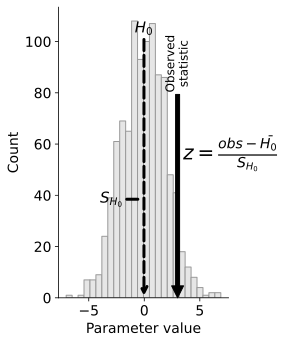

In [16]:
# p_z is appropriate for roughly Gaussian H0 distributions

H0 = np.random.normal(0,2,size=1000)

plt.figure(figsize=(4,5))
h = plt.hist(H0,bins='fd',color=(.9,.9,.9),edgecolor=(.6,.6,.6))
plt.annotate('Observed\nstatistic',xytext=[3,.95*np.max(h[0])],va='top',ha='center',rotation=90,size=12,
             xy=[3,0],arrowprops={'color':'k'})

plt.annotate(r'$H_0$',xytext=[np.mean(H0),np.max(h[0])],va='top',ha='center',rotation=0,size=15,weight='bold',
             xy=[np.mean(H0),0],arrowprops={'color':'k','arrowstyle':'->','linestyle':'--','linewidth':3})
plt.annotate(r'$S_{H_0}$',xytext=[-np.std(H0,ddof=1)*2,np.mean(h[0])],va='center',rotation=0,size=15,weight='bold',
             xy=[np.mean(H0),np.mean(h[0])],arrowprops={'color':'k','arrowstyle':'-','linestyle':'--','linewidth':3})

plt.text(3.5,np.max(h[0])/2,r'$z= \frac{obs-\bar{H_0}}{S_{H_0}}$',size=20)

# labels
plt.xlabel('Parameter value')
plt.ylabel('Count')

# display the figure
plt.tight_layout()
plt.show()

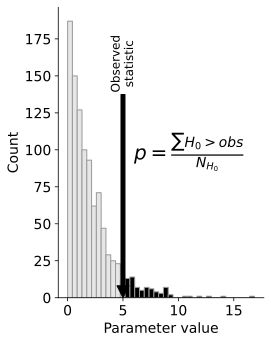

In [18]:
# p_c is appropriate for any shape H0 distributions

H0 = np.random.exponential(2,size=1000)

plt.figure(figsize=(4,5))
h = plt.hist(H0,bins='fd',color=(.9,.9,.9),edgecolor=(.6,.6,.6))
plt.annotate('Observed\nstatistic',xytext=[5,.95*np.max(h[0])],va='top',ha='center',rotation=90,size=12,
             xy=[5,0],arrowprops={'color':'k'})

plt.text(6,np.max(h[0])/2,r'$p = \frac{\sum{H_0} > obs}{N_{H_0}}$',size=20)

# paint bars black if greater than statistic
for p in h[2]:
  if p.get_x()>5: p.set_facecolor('k')

plt.xlabel('Parameter value')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Fig 16.7: Permutation testing for the mean of one sample

In [20]:
# create non-normal data
N = 87
data = stats.gamma.rvs(1.2,size=N)
h0val = 1
sampleMean = np.mean(data)

In [21]:
# permutation testing

data4perm = data - h0val # shift the problem such that H0=0
obsMean = np.mean(data4perm)

nPerms = 1000
permMeans = np.zeros(nPerms)

for permi in range(nPerms):

  # create a vector of +/- 1's
  randSigns = np.sign(np.random.randn(N))

  # mean of shuffled data
  permMeans[permi] = np.mean( randSigns*np.abs(data4perm) )



# compute p-value based on extreme count
pval = np.sum(np.abs(permMeans) > np.abs(obsMean)) / nPerms

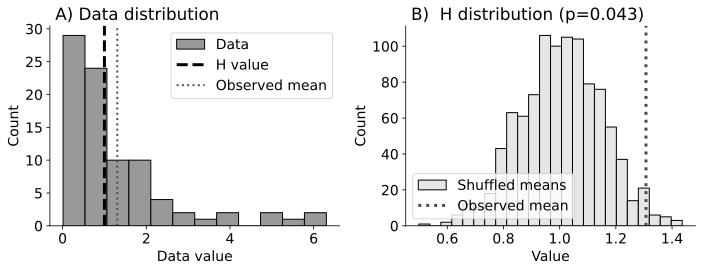

In [22]:
_,axs = plt.subplots(1,2,figsize=(10,4))

axs[0].hist(data,bins='fd',color=(.6,.6,.6),edgecolor='k',label='Data')
axs[0].axvline(x=h0val,color='k',linestyle='--',linewidth=3,label=r'H value')
axs[0].axvline(x=sampleMean,color=(.3,.3,.3),linestyle=':',linewidth=2,label='Observed mean')
axs[0].legend()
axs[0].set_title(r' A) Data distribution')
axs[0].set(xlabel='Data value',ylabel='Count')

# histogram of permutations (adding back h0 value for visualization)
axs[1].hist(permMeans+h0val,bins='fd',color=(.9,.9,.9),edgecolor='k',label='Shuffled means')
axs[1].axvline(x=sampleMean,color=(.3,.3,.3),linestyle=':',linewidth=3,label='Observed mean')
axs[1].set_title(rf' B)  H distribution (p={pval})')
axs[1].set(xlabel='Value',ylabel='Count')
axs[1].legend(loc='lower left')

plt.tight_layout()
plt.show()